<a href="https://colab.research.google.com/github/AndreaMeza2800/SimulacionII/blob/main/Tarea_Parcial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install yfinance #Instalaos paqueteria yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 6.4 MB 18.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternativa
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

1. Descargue los datos de las acciones de alguna empresa usando yfinance 


In [5]:
import numpy as np
import pandas as pd
import yfinance as yf

Definimos los parametros de los datos. Usamos acciones de Amazon

In [67]:
RISKY_ASSET = 'GOOGL'
START_DATE = '2022-01-01'
END_DATE = '2022-06-15'

Los cargamos en un data frame de pandas

In [68]:
df = yf.download(RISKY_ASSET, start=START_DATE, end=END_DATE, adjusted=True)
print(f'Descargados {df.shape[0]} renglones de datos.')

[*********************100%***********************]  1 of 1 completed
Descargados 113 renglones de datos.


In [69]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,2901.100098,2917.020020,2874.260010,2899.830078,2899.830078,1432300
2022-01-04,2907.919922,2929.699951,2874.330078,2887.989990,2887.989990,1420000
2022-01-05,2888.399902,2889.989990,2753.760010,2755.500000,2755.500000,2730900
2022-01-06,2739.969971,2798.800049,2731.169922,2754.949951,2754.949951,1867400
2022-01-07,2762.909912,2768.969971,2715.330078,2740.340088,2740.340088,1488000
...,...,...,...,...,...,...
2022-06-08,2335.229980,2371.409912,2332.000000,2343.879883,2343.879883,1305400
2022-06-09,2326.550049,2365.979980,2295.520020,2296.709961,2296.709961,1289900
2022-06-10,2248.899902,2265.580078,2207.320068,2223.229980,2223.229980,2072600


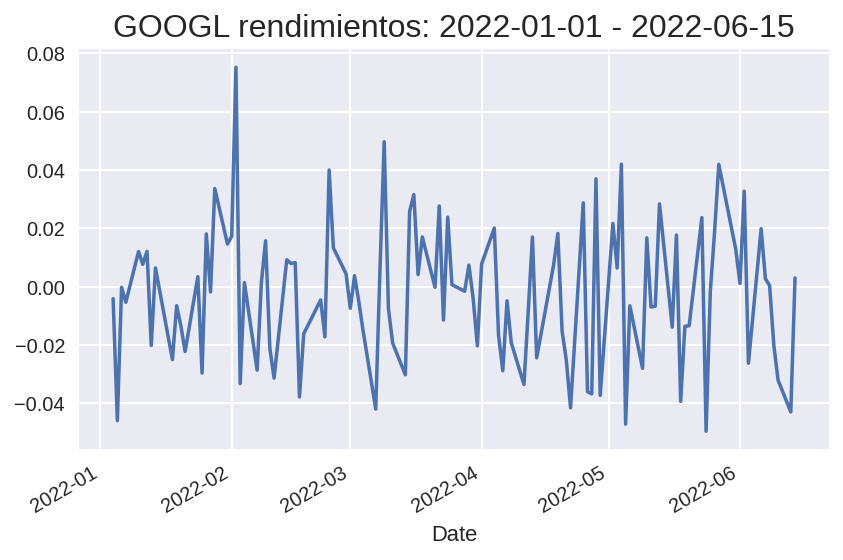

Rendimiento promedio: -0.25%


In [70]:
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()   

ax = returns.plot()
ax.set_title(f'{RISKY_ASSET} rendimientos: {START_DATE} - {END_DATE}', 
             fontsize=16)


plt.tight_layout()
#plt.savefig('imagen1.png')
plt.show()

print(f'Rendimiento promedio: {100 * returns.mean():.2f}%')

Graficamos el histograma para darnos una idea de si realmente siguen una distribución normal

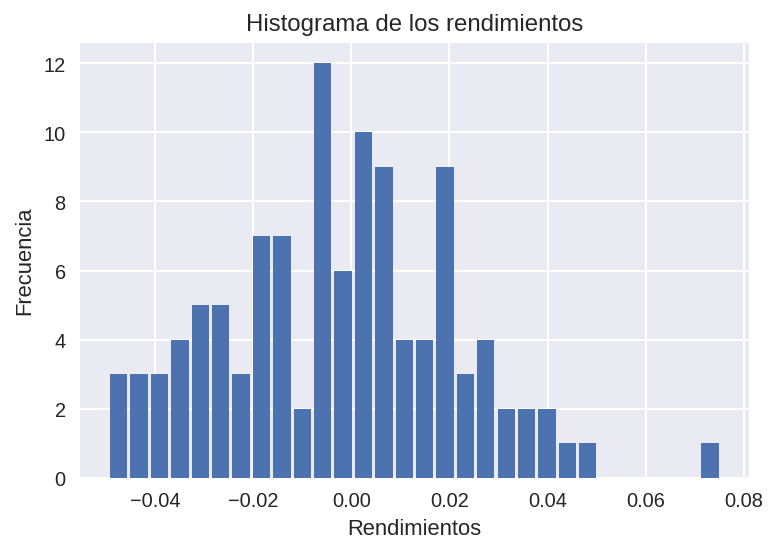

In [71]:
plt.hist(x=returns, rwidth=0.85, bins=30)
plt.title('Histograma de los rendimientos')
plt.xlabel('Rendimientos')
plt.ylabel('Frecuencia')

plt.show()

2. Formando conjuntos de entrenamiento y de prueba de tres tamaños distintos

In [146]:
train1 = returns['2021-01-01':'2022-04-30']
test1 = returns['2022-05-01':'2022-06-01']

In [147]:
train2 = returns['2021-01-01':'2022-03-31']
test2 = returns['2022-04-01':'2022-06-01']

In [148]:
train3 = returns['2021-01-01':'2022-01-31']
test3 = returns['2022-02-01':'2022-06-01']

In [149]:
T1 = len(test1)   # longitud del periodo de predicción
N1 = len(test1)   # número de incrementos unitarios en el periodo de predicción
S_01 = adj_close[train1.index[-1]]  # precio inicial
N_SIM = 100

# Obtenemos los parametros del subconjunto de entrenamiento

mu1 = train1.mean()    
sigma1 = train1.std()

In [150]:
print(len(train1),len(test1))

81 22


In [151]:
T2 = len(test2)   # longitud del periodo de predicción
N2 = len(test2)   # número de incrementos unitarios en el periodo de predicción
S_02 = adj_close[train2.index[-1]]  # precio inicial
N_SIM2 = 100

# Obtenemos los parametros del subconjunto de entrenamiento

mu2 = train2.mean()    
sigma2 = train2.std()

In [152]:
print(len(train2),len(test2))

61 42


In [153]:
T3 = len(test3)   # longitud del periodo de predicción
N3 = len(test3)   # número de incrementos unitarios en el periodo de predicción
S_03 = adj_close[train3.index[-1]]  # precio inicial
N_SIM = 100

# Obtenemos los parametros del subconjunto de entrenamiento

mu3 = train3.mean()    
sigma3 = train3.std()

In [154]:
print(len(train3),len(test3))

19 84


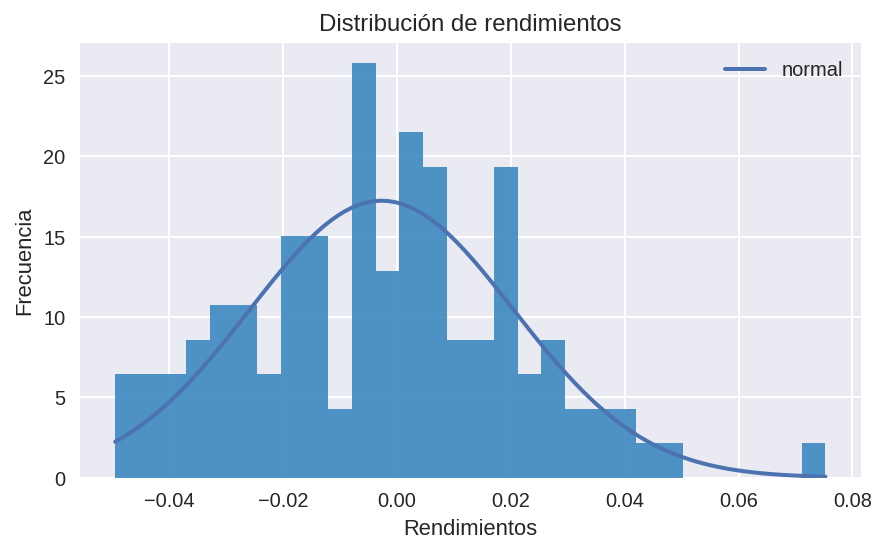

In [155]:
mu1, sigma1
from scipy import stats
x_hat = np.linspace(min(returns), max(returns), num=100)
y_hat = stats.norm.pdf(x_hat, mu1, sigma1)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=returns, density=True, bins=30, color="#3182bd", alpha=0.85)
ax.set_title('Distribución de rendimientos')
ax.set_xlabel('Rendimientos')
ax.set_ylabel('Frecuencia')
ax.legend();

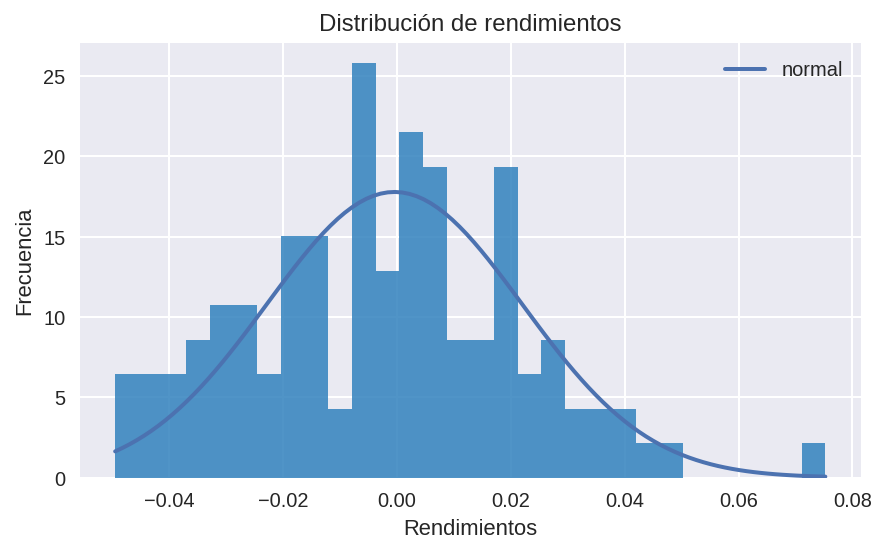

In [141]:
mu2, sigma2
from scipy import stats
x_hat = np.linspace(min(returns), max(returns), num=100)
y_hat = stats.norm.pdf(x_hat, mu2, sigma2)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=returns, density=True, bins=30, color="#3182bd", alpha=0.85)
ax.set_title('Distribución de rendimientos')
ax.set_xlabel('Rendimientos')
ax.set_ylabel('Frecuencia')
ax.legend();

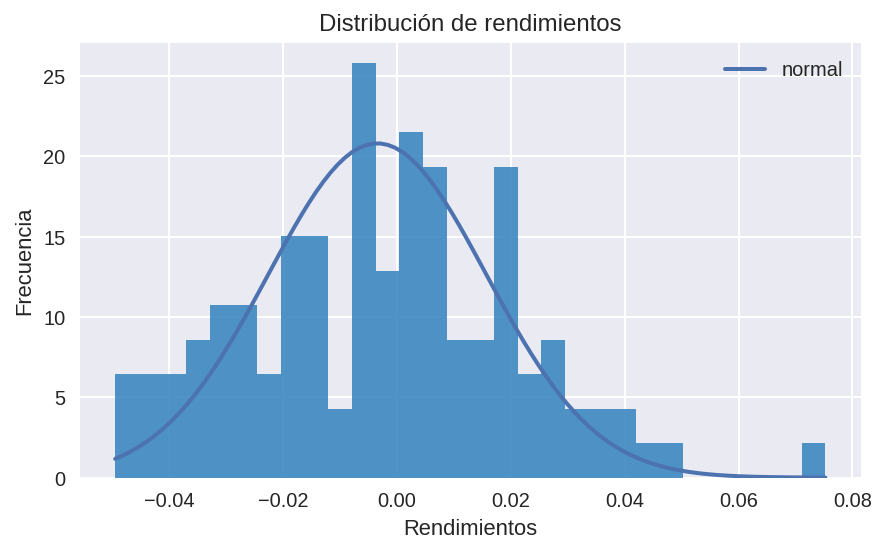

In [156]:
mu3, sigma3
from scipy import stats
x_hat = np.linspace(min(returns), max(returns), num=100)
y_hat = stats.norm.pdf(x_hat, mu3, sigma3)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=returns, density=True, bins=30, color="#3182bd", alpha=0.85)
ax.set_title('Distribución de rendimientos')
ax.set_xlabel('Rendimientos')
ax.set_ylabel('Frecuencia')
ax.legend();

4. Ejecute la simulación MC y grafique la predicción.

In [157]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, random_seed=242):

    np.random.seed(random_seed)  # fijamos la semilla
    
    dt = T/N                     # incremento temporal
    dW = np.random.normal(scale = np.sqrt(dt), size=(n_sims, N))
    W = np.cumsum(dW, axis=1)
    
    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))
    
    S_t = s_0 * np.exp((mu - 0.5 * sigma**2) * time_steps + sigma * W)   # Matriz (n_sim, T+1)
    S_t = np.insert(S_t, 0, s_0, axis=1)                 #Los reglones son trayectorias , columnas son tiempo
    
    return S_t

In [158]:
gbm_simulations1 = simulate_gbm(S_01, mu1, sigma1, N_SIM, T1, N1)

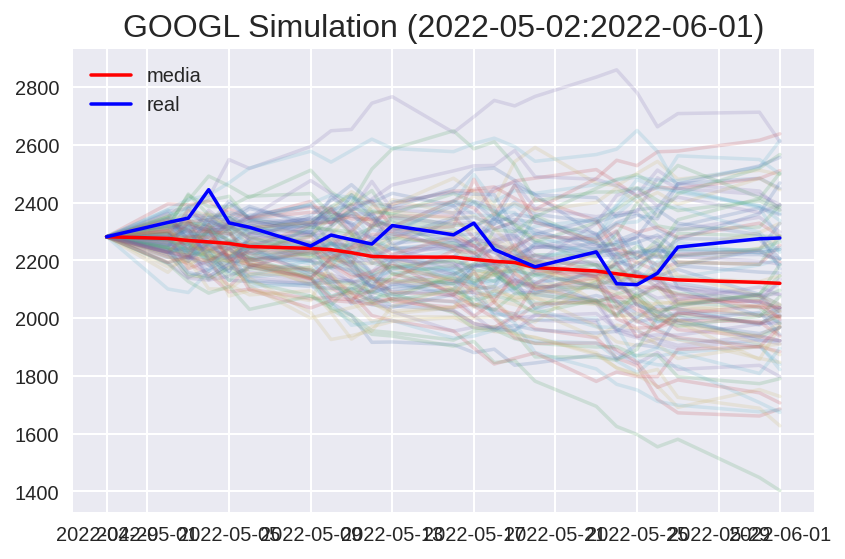

In [159]:
last_train_date = train1.index[-1].date()
first_test_date = test1.index[0].date()
last_test_date = test1.index[-1].date()
plot_title = (f'{RISKY_ASSET} Simulation 'f'({first_test_date}:{last_test_date})')

selected_indices = adj_close[last_train_date:last_test_date].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations1),   # se ponen datos simulados en un DF para visualizarlos
                                  index=index)

# Grafica
ax = gbm_simulations_df.plot(alpha=0.2, legend=False) # alpha hace transparentes las lineas
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), 
                  color='red')
line_2, = ax.plot(index, adj_close[last_train_date:last_test_date], 
                  color='blue')
ax.set_title(plot_title, fontsize=16)
ax.legend((line_1, line_2), ('media', 'real'))

plt.tight_layout()
#plt.savefig('imagen2.png')
plt.show()

In [164]:
gbm_simulations2=simulate_gbm(S_02, mu2, sigma2, N_SIM2, T2, N2)

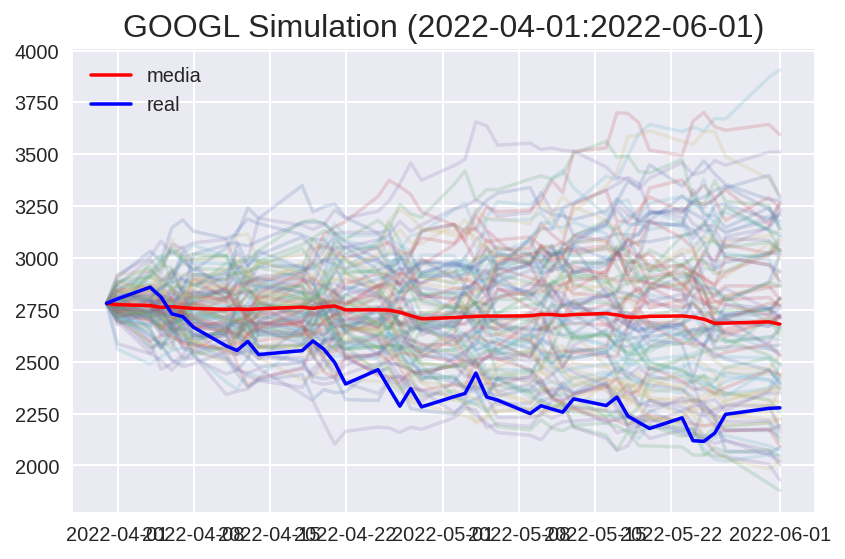

In [165]:
last_train_date = train2.index[-1].date()
first_test_date = test2.index[0].date()
last_test_date = test2.index[-1].date()
plot_title = (f'{RISKY_ASSET} Simulation 'f'({first_test_date}:{last_test_date})')

selected_indices = adj_close[last_train_date:last_test_date].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations2),   # se ponen datos simulados en un DF para visualizarlos
                                  index=index)

# Grafica
ax = gbm_simulations_df.plot(alpha=0.2, legend=False) # alpha hace transparentes las lineas
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), 
                  color='red')
line_2, = ax.plot(index, adj_close[last_train_date:last_test_date], 
                  color='blue')
ax.set_title(plot_title, fontsize=16)
ax.legend((line_1, line_2), ('media', 'real'))

plt.tight_layout()
#plt.savefig('imagen2.png')
plt.show()

In [162]:
gbm_simulations3 = simulate_gbm(S_03, mu3, sigma3, N_SIM, T3, N3)

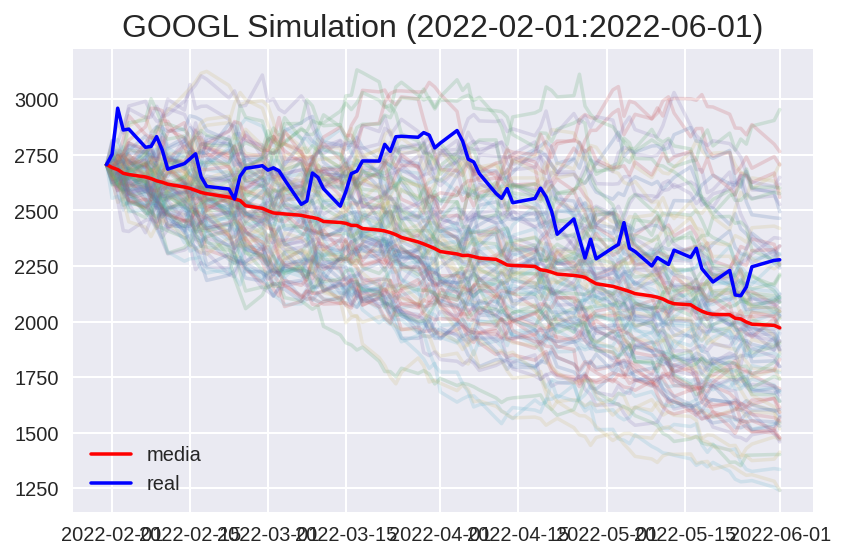

In [163]:
last_train_date = train3.index[-1].date()
first_test_date = test3.index[0].date()
last_test_date = test3.index[-1].date()
plot_title = (f'{RISKY_ASSET} Simulation 'f'({first_test_date}:{last_test_date})')

selected_indices = adj_close[last_train_date:last_test_date].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations3),   # se ponen datos simulados en un DF para visualizarlos
                                  index=index)

# Grafica
ax = gbm_simulations_df.plot(alpha=0.2, legend=False) # alpha hace transparentes las lineas
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), 
                  color='red')
line_2, = ax.plot(index, adj_close[last_train_date:last_test_date], 
                  color='blue')
ax.set_title(plot_title, fontsize=16)
ax.legend((line_1, line_2), ('media', 'real'))

plt.tight_layout()
#plt.savefig('imagen2.png')
plt.show()